## Import python libraries

In [1]:
import pandas as pd #For DataFrames
import numpy as np #Mathmatical Operations
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
plt.style.use('seaborn')

## Load data

In [2]:
diabetes = pd.read_csv('diabetes.csv')

## Show frist 5th rows

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Show last 5th rows

In [4]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes.shape

(768, 9)

In [9]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


if we notice that, we will see most columns have zeros

## Check null values

In [10]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## make a copy of dataset to chect number of zeros

In [11]:
diabetes_copy = diabetes.copy(deep=True)

In [12]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### replaced zeros with nan values to be easily counted

In [13]:
diabetes_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = diabetes_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [14]:
diabetes_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

we will replace zeros with mean values becouse the data types are numeric

In [15]:
diabetes['Glucose'] = diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].mean())
diabetes['Insulin'] = diabetes['Insulin'].replace(0,diabetes['Insulin'].mean())
diabetes['BMI'] = diabetes['BMI'].replace(0,diabetes['BMI'].mean())

### check the outliers

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

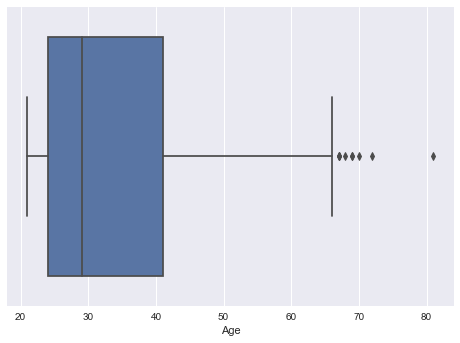

In [16]:
sns.boxplot(diabetes['Age'])

<BarContainer object of 768 artists>

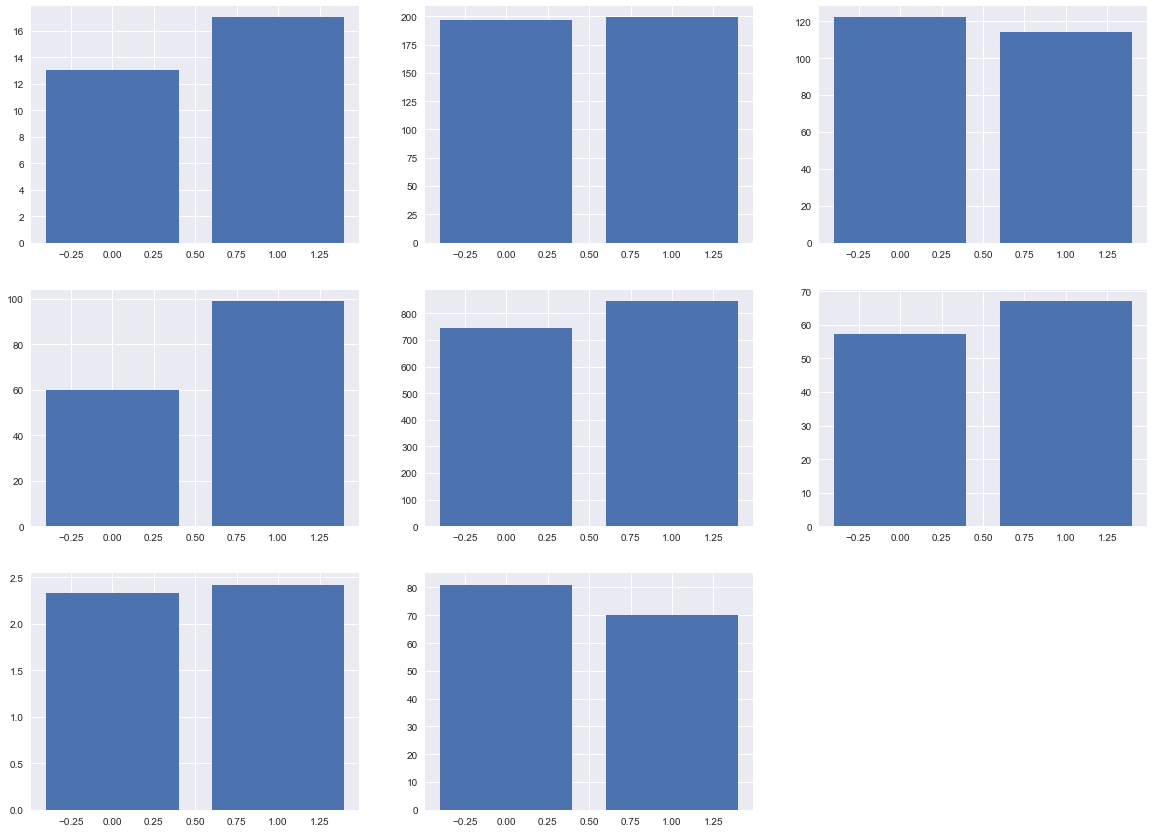

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.bar(diabetes.Outcome ,diabetes['Pregnancies'])
plt.subplot(4,3,2)
plt.bar(diabetes.Outcome ,diabetes['Glucose'])
plt.subplot(4,3,3)
plt.bar(diabetes.Outcome ,diabetes['BloodPressure'])
plt.subplot(4,3,4)
plt.bar(diabetes.Outcome ,diabetes['SkinThickness'])
plt.subplot(4,3,5)
plt.bar(diabetes.Outcome ,diabetes['Insulin'])
plt.subplot(4,3,6)
plt.bar(diabetes.Outcome ,diabetes['BMI'])
plt.subplot(4,3,7)
plt.bar(diabetes.Outcome ,diabetes['DiabetesPedigreeFunction'])
plt.subplot(4,3,8)
plt.bar(diabetes.Outcome ,diabetes['Age'])

<AxesSubplot:>

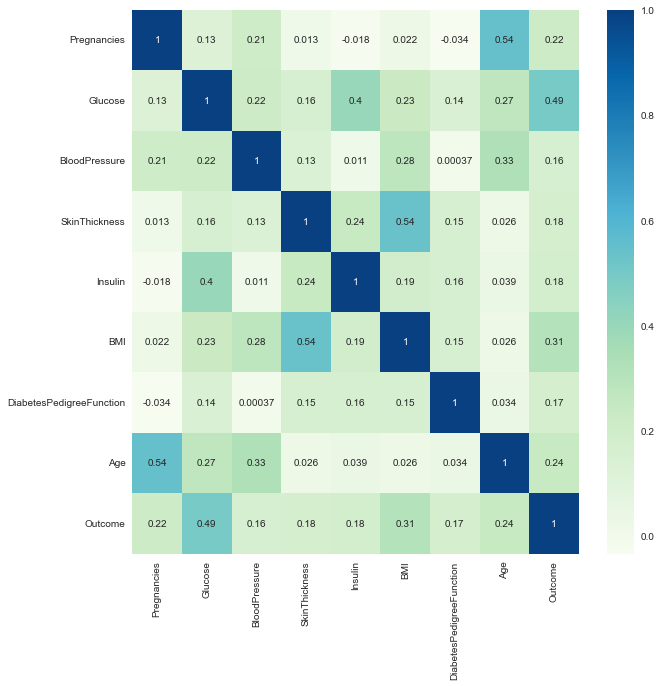

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(diabetes.corr(),annot=True,cmap='GnBu')

## Modelling

In [27]:
pd.get_dummies(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


### prepare the data test and train for the logistic regression algorithim

In [28]:
x = diabetes.drop('Outcome', axis = 1)
y = diabetes.Outcome

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred = lr.predict(X_test) 

### get score

In [33]:
lr.score(X_test,y_test)

0.7792207792207793

### find mean squre error

In [34]:
from sklearn.metrics import mean_squared_error
MSE_lr=mean_squared_error(y_test,y_pred)

In [35]:
MSE_lr

0.22077922077922077

###  using random forest algorithim

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf =RandomForestClassifier(max_depth=10)

In [69]:
rf.fit(x,y)

RandomForestClassifier(max_depth=10)

In [70]:
y_pred2 = rf.predict(X_test) 

In [71]:
MSE_lr2=mean_squared_error(y_test,y_pred2)
MSE_lr2

0.0

In [72]:
rf.score(X_test,y_test)

1.0

Rondom forest model score is higher than logistic regression

### Coff matrix

In [75]:
from sklearn.metrics import confusion_matrix
coff = confusion_matrix(y_test,y_pred2)

In [76]:
coff

array([[99,  0],
       [ 0, 55]], dtype=int64)

### Find precision, recall, and f1 score

In [78]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred2)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        99\n           1       1.00      1.00      1.00        55\n\n    accuracy                           1.00       154\n   macro avg       1.00      1.00      1.00       154\nweighted avg       1.00      1.00      1.00       154\n'

## Final accourcy is 100%